In [1]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(42)

In [2]:
def create_f(A):
    def f(ratings_v, history_mean, history_std):
        return np.sqrt(np.maximum(0, A + (ratings_v - history_mean) / history_std))
    return f

def create_f2(A):
    def f(ratings_v, history_mean, history_std):
        return np.exp(A + (ratings_v - history_mean) / history_std)
    return f

In [3]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="Renorm 0"), 
            ev.Aggregator(rule=ev.RuleFastNash(f=create_f(1)), name="Renorm 1"),
            ev.Aggregator(rule=ev.RuleFastNash(f=create_f(10)), name="Renorm 10"),
            ev.Aggregator(rule=ev.RuleFastNash(f=create_f(100)), name="Renorm 100"),
            ev.Aggregator(rule=ev.RuleSumRatings(), name="Sum"),
            ev.Aggregator(rule=ev.RuleFastNash(f=create_f(-1)), name="Renorm -1")]

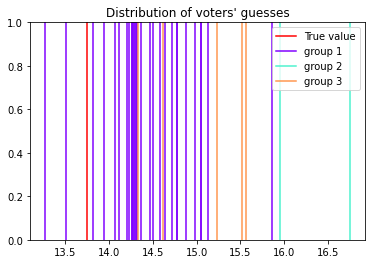

In [5]:
groups_sizes = [30, 2, 5]
features = [[1, 0], [0, 1], [0.3,0.7]]

generator = ev.RatingsGeneratorEpistemicGroupsMix(groups_sizes, features, group_noise=8, independent_noise=0.5)
generator.plot_ratings()

In [21]:
onlineLearning = ev.OnlineLearning(list_agg, generator)

In [25]:
n_candidates = 20
n_steps = 25
n_try = 1000
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [45:31<00:00,  2.73s/it]


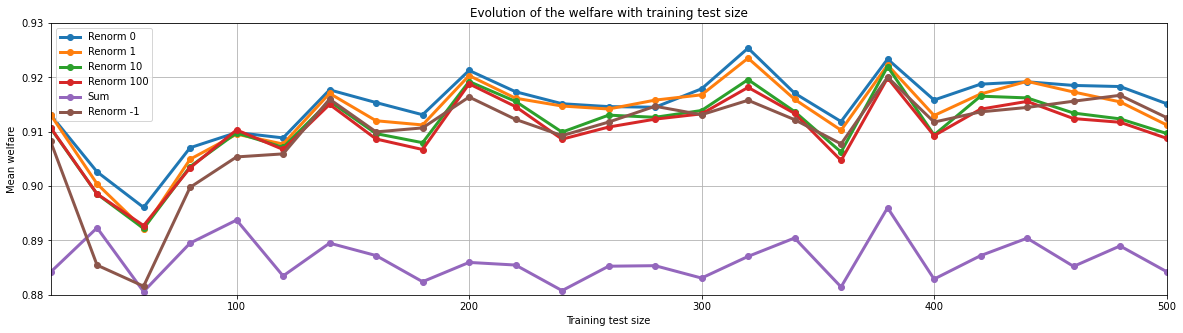

In [26]:
onlineLearning.plot(show=False)
plt.ylim(0.88,0.93)
plt.show()

In [15]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="Renorm 0"),
            ev.Aggregator(rule=ev.RuleFastNash(f=create_f2(0)), name = "Exp 0"),
            ev.Aggregator(rule=ev.RuleFastNash(f=lambda x,y,z: x), name= "Id")]

In [16]:
onlineLearning = ev.OnlineLearning(list_agg, generator)

In [17]:
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 500/500 [08:01<00:00,  1.04it/s]


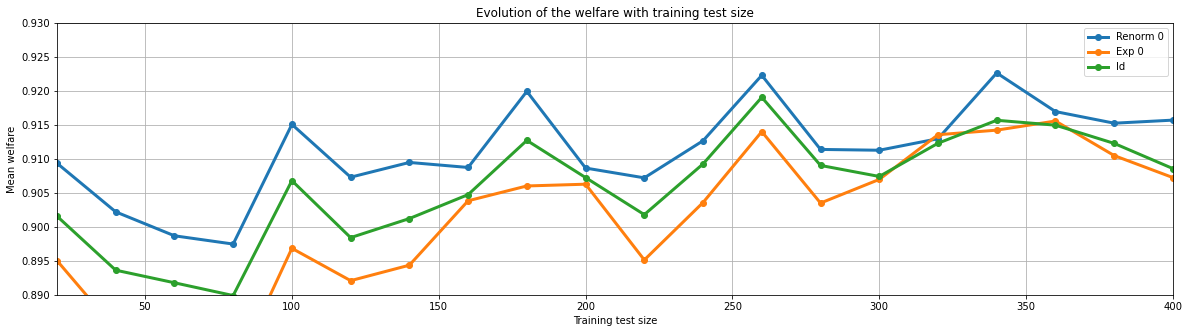

In [18]:
onlineLearning.plot(show=False)
plt.ylim(0.89,0.93)
plt.show()

In [5]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="Renorm 0"),
            ev.Aggregator(rule=ev.RuleFastNash(f=create_f2(0)), name = "Exp 0"),
            ev.Aggregator(rule=ev.RuleFastNash(f=lambda x,y,z: x), name= "Id"),
            ev.AggregatorSumRatings(),
            ev.AggregatorProductRatings(),
            ev.AggregatorMLEGaussian()]

In [6]:
onlineLearning = ev.OnlineLearning(list_agg, generator)
n_candidates = 20
n_steps = 25
n_try = 1000
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [32:36<00:00,  1.96s/it]


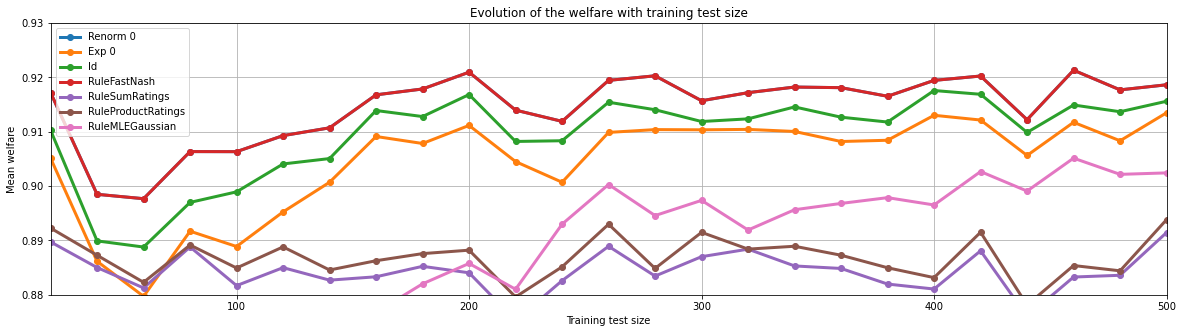

In [7]:
onlineLearning.plot(show=False)
plt.ylim(0.88,0.93)
plt.show()

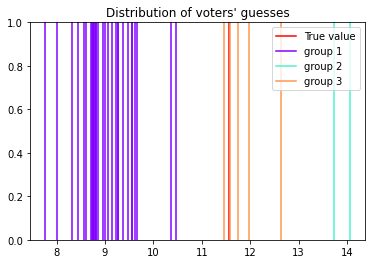

In [4]:
groups_sizes = [30, 2, 5]
features = [[1, 0], [0, 1], [0.3,0.7]]

generator_2 = ev.RatingsGeneratorEpistemicGroupsMixScale(groups_sizes, features, group_noise=8, independent_noise=0.5,
                                                       center_gap=10, max_scale=3)
generator_2.plot_ratings()

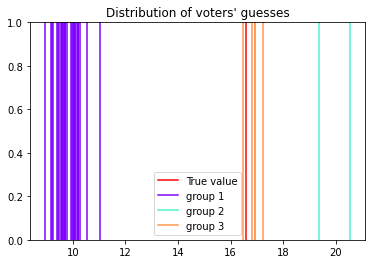

In [8]:
generator_2.plot_ratings()

In [10]:
onlineLearning = ev.OnlineLearning(list_agg, generator_2)
n_candidates = 20
n_steps = 25
n_try = 1000
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [23:53<00:00,  1.43s/it]


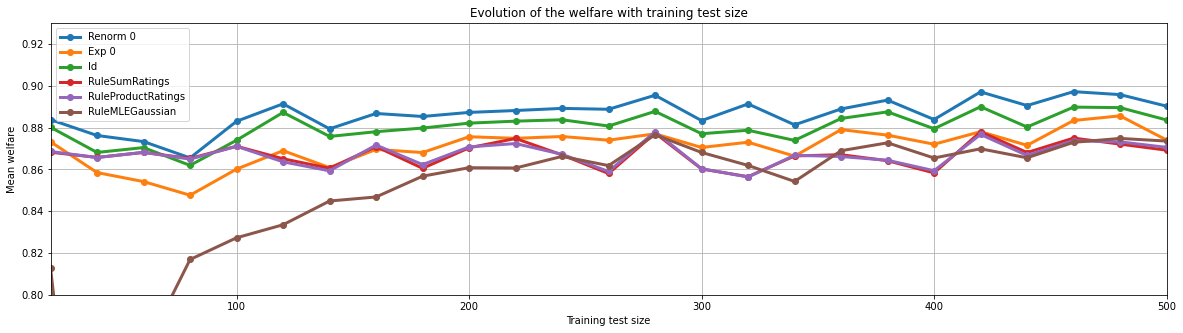

In [12]:
onlineLearning.plot(show=False)
plt.ylim(0.8,0.93)
plt.show()

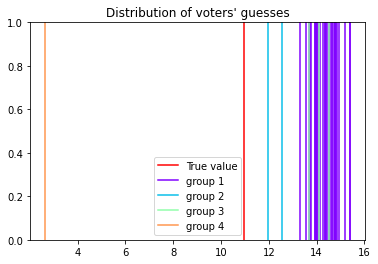

In [9]:
groups_sizes = [32, 2, 3, 1]
features = [[1, 0,0,0], [0, 1,0,0], [0,0,1,0], [0,0,0,1]]

generator_3 = ev.RatingsGeneratorEpistemicGroupsMixScale(groups_sizes, features, group_noise=8, independent_noise=0.5,
                                                       center_gap=25, max_scale=4)
generator_3.plot_ratings()

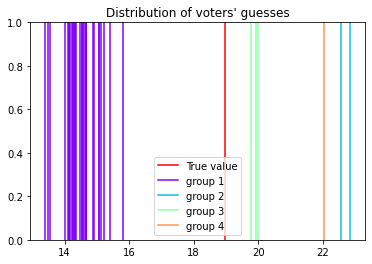

In [14]:
generator_3.plot_ratings()

In [14]:
onlineLearning = ev.OnlineLearning(list_agg, generator_3)
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [24:09<00:00,  1.45s/it]


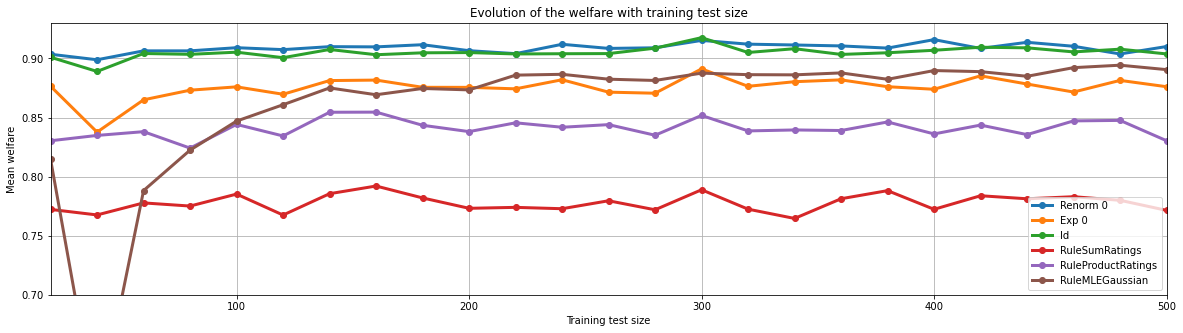

In [16]:
onlineLearning.plot(show=False)
plt.ylim(0.7,0.93)
plt.show()